In [1]:
from pathlib import Path
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import requests
from PIL import Image
from io import BytesIO

from yolo_model import YoloPretraining
from imagenet100 import get_imagenet100_mappings, get_train_val_aug

# Test yolo backbone
Bruh there is no golden retriever in imagenet100

In [2]:
# load everything
pretrained_path = Path("accelerate_logs/exp_2023-07-11_22-33-32/checkpoints/checkpoint_20/pytorch_model.bin")
imangenet100_json = Path("../../data/imagenet100/Labels.json")
model = YoloPretraining(n_classes=100).eval()
model.load_state_dict(torch.load(pretrained_path, map_location="cpu"))
_, val_aug = get_train_val_aug()
_, id2name = get_imagenet100_mappings(imangenet100_json)

In [3]:
def predict_topk(model, id2name, val_aug, k, url):
    # download_image
    image_bytes = requests.get(url).content
    pil_image = Image.open(BytesIO(image_bytes)).convert("RGB")
    array_image = np.array(pil_image)
    plt.figure(figsize=(6, 3))
    plt.imshow(array_image)
    plt.axis("off")
    plt.show()
    # predict!
    image_tensor = val_aug(image=array_image)["image"].unsqueeze(0)
    with torch.no_grad():
        pred = model(image_tensor).squeeze(0).softmax(-1)
    probs, indices = pred.topk(k)
    for prob, idx in zip(probs.tolist(), indices.tolist()):
        print(f"{prob:.4f}", id2name[idx])

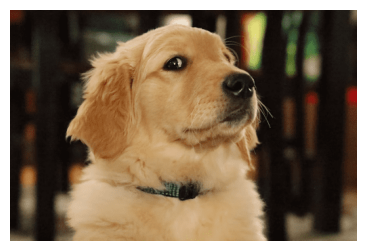

0.5844 sulphur-crested cockatoo
0.0707 wombat
0.0593 goldfinch
0.0584 wallaby
0.0561 flamingo


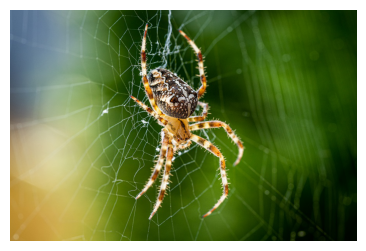

0.9870 garden spider
0.0112 barn spider
0.0017 black and gold garden spider
0.0000 wolf spider
0.0000 harvestman


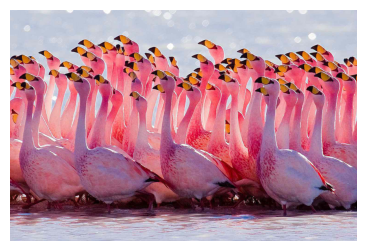

0.9170 snail
0.0703 conch
0.0073 spiny lobster
0.0015 flamingo
0.0007 hermit crab


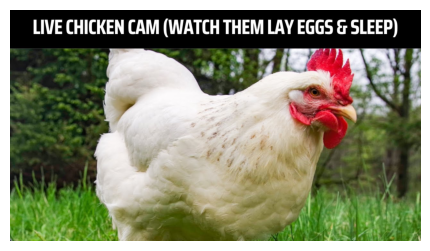

0.9423 hen
0.0419 cock
0.0075 spoonbill
0.0059 white stork
0.0017 goose


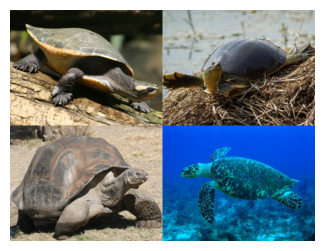

0.3190 terrapin
0.2646 boa constrictor
0.1070 sea lion
0.1065 leatherback turtle
0.0264 sulphur-crested cockatoo


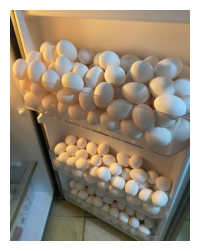

0.5877 sea anemone
0.2242 green mamba
0.0472 green snake
0.0249 vine snake
0.0245 sea slug


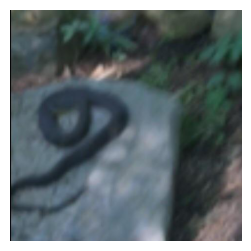

0.3335 sea snake
0.2546 nematode
0.1498 chiton
0.0479 spotted salamander
0.0306 snail


In [9]:
URLS = [
    "https://global-uploads.webflow.com/59dbe1c3542805000192616b/63178a7970d1b57a4c6a7a05_golden-retriever.png",
    "https://www.ox.ac.uk/sites/files/oxford/field/field_image_main/shutterstock_garden%20cross%20spider_crop.jpg",
    "https://www.thespruce.com/thmb/mw-0Q-pFQ27CGwiiIFVgpIaUuaQ=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/puna-flamingo-58a6cb7d5f9b58a3c9fc5fc8.jpg",
    "https://i.ytimg.com/vi/McHENfPesH8/maxresdefault.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/2/21/Turtle_diversity.jpg",
    "https://pbs.twimg.com/media/EXmhMYqWAAA6trb.jpg",
    "https://i.redd.it/nz2zhypl2kgz.jpg",
]
for url in URLS:
    predict_topk(model, id2name, val_aug, k=5, url=url)